In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player  Nation    Pos  \
0              0     Theo Hernández  fr FRA     DF   
1              1    Marcel Sabitzer  at AUT     MF   
2              2   Dejan Kulusevski  se SWE  MF,FW   
3              3      Julian Brandt  de GER  FW,MF   
4              4  Nikola Milenković  rs SRB     DF   
...          ...                ...     ...    ...   
1507        2504   Souleymane Touré  fr FRA     DF   
1508        2506        Jere Uronen  fi FIN     DF   
1509        2507         Yan Valery  tn TUN     DF   
1510        2513            Vitinha  pt POR     MF   
1511        2518  Alessandro Zanoli  it ITA     DF   

                                                  Squad  \
0                                                 Milan   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                           Juventus+Tottenham+Juventus   
3                                              Dortmund   
4                                            Fiorentina   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                Comp   Age    Born     MP  \
0                                         it Serie A  25.0  1997.0   97.0   
1     de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2           it Serie A+eng Premier League+it Serie A  23.0  2000.0  103.0   
3                                      de Bundesliga  27.0  1996.0   94.0   
4                                         it Serie A  25.0  1997.0   95.0   
...                                              ...   ...     ...    ...   
1507                                      fr Ligue 1  19.0  2003.0   24.0   
1508                        fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                   eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                      fr Ligue 1  22.0  2000.0   50.0   
1511                                      it Serie A  21.0  2000.0   23.0   

      Starts      Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       95.0     8415  93.5         0.17       0.31        0.15          0.29   
1       46.0    53186  47.1         0.21       0.34        0.13          0.25   
2       61.0  1265762  67.0         0.18       0.49        0.18          0.49   
3       68.0     5970  66.3         0.32       0.59        0.32          0.59   
4       91.0     8097  89.9         0.07       0.09        0.07          0.09   
...      ...      ...   ...          ...        ...         ...           ...   
1507    18.0     1656  18.4         0.05       0.05        0.05          0.05   
1508    12.0      976  10.8         0.00       0.09        0.00          0.09   
1509    31.0     2542  28.2         0.00       0.00        0.00          0.00   
1510    34.0     2910  32.4         0.12       0.22        0.12          0.22   
1511    16.0     1552  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.13          0.28        0.11            0.26               272.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.15          0.36        0.15            0.36               260.0   
3         0.18          0.43        0.18            0.43               185.0   
4         0.09          0.10        0.09            0.10                13.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509      0.03          0.07  

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0             Player   Nation Pos                    Squad  \
0              0         Max Aarons  eng ENG  DF              Bournemouth   
1              3   Yunis Abdelhamid   ma MAR  DF                    Reims   
2              4  Salis Abdul Samed   gh GHA  MF                     Lens   
3              5    Laurent Abergel   fr FRA  MF                  Lorient   
4              7              Abner   br BRA  DF                    Betis   
...          ...                ...      ...  ..                      ...   
1185         128         Kevin Vogt   de GER  DF  Hoffenheim+Union Berlin   
1186         129          Elye Wahi   fr FRA  FW         Montpellier+Lens   
1187         134       Duván Zapata   co COL  FW          Torino+Atalanta   
1188         135     Bryan Zaragoza   es ESP  MF    Granada+Bayern Munich   
1189         138        Milan Đurić   ba BIH  FW      Hellas Verona+Monza   

                          Comp   Age    Born  MP  Starts   Min   90s  \
0           eng Premier League  24.0  2000.0  14      12  1085  12.1   
1                   fr Ligue 1  36.0  1987.0  21      21  1881  20.9   
2                   fr Ligue 1  23.0  2000.0  22      15  1384  15.4   
3                   fr Ligue 1  31.0  1993.0  24      24  2141  23.8   
4                   es La Liga  23.0  2000.0  17      13  1164  12.9   
...                        ...   ...     ...  ..     ...   ...   ...   
1185             de Bundesliga  32.0  1991.0  25      23  2102  23.4   
1186                fr Ligue 1  21.0  2003.0  19      13  1085  12.1   
1187                it Serie A  32.0  1991.0  27      26  2161  24.0   
1188  es La Liga+de Bundesliga  22.0  2001.0  22      18  1666  18.5   
1189                it Serie A  33.0  1990.0  26      17  1595  17.7   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.00       0.08        0.00          0.08      0.00   
1            0.14       0.14        0.14          0.14      0.11   
2            0.00       0.00        0.00          0.00      0.05   
3            0.04       0.08        0.04          0.08      0.03   
4            0.00       0.00        0.00          0.00      0.01   
...           ...        ...         ...           ...       ...   
1185         0.00       0.00        0.00          0.00      0.03   
1186         0.41       0.58        0.33          0.50      0.59   
1187         0.38       0.50        0.38          0.50      0.32   
1188         0.32       0.43        0.27          0.38      0.21   
1189         0.28       0.40        0.23          0.34      0.29   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.07        0.00            0.07                31.0   
1             0.12        0.11            0.12                14.0   
2             0.09        0.05            0.09                16.0   
3             0.10        0.03            0.10                44.0   
4             0.05        0.01            0.05                12.0   
...            ...         ...             ...                 ...   
1185          0.05        0.03            0.05                 6.0   
1186          0.08        0.52            0.08                26.0   
1187          0.43        0.32            0.43                80.0   
1188          0.21        0.16            0.16               132.0   
1189          0.48        0.16            0.30                 4.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              12.0            38.7              11.0               35.5   
1               8.0            57.1               6.0               42.9   
2               6.0            37.5               9.0               56.3   
3              31.0            70.5              12.0               27.3   
4               6.0            50.0               5.0               41.7   
...             ...             ...               ...                ...   
1185            5.0       

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
Mbappe=forward_players[forward_players['Player']=='Kylian Mbappé']
Mbappe

Unnamed: 0         Player  Nation Pos      Squad        Comp   Age  \
21         201  Kylian Mbappé  fr FRA  FW  Paris S-G  fr Ligue 1  24.0   

      Born     MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
21  1998.0  100.0    93.0  8221  91.3         0.92       1.24        0.77   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
21          1.09      0.79          1.06        0.66            0.93   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
21               587.0          276.0            47.0             292.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
21               50.0           55.49                    0.35   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
21                    1.46                   18.17                   36.55   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
21                    9.24                      55.32   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
21                       6.43                  3.02                      3.2   

    Carries_per_90  Total_Distance_per_90  \
21           43.28                 289.74   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
21                               151.87                        5.89   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
21                3.82                          3.0                2.81   

    Dispossessed_per_90  Passes_Received_per_90  \
21                 1.59                   48.04   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
21                               13.82                        4.73   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
21                     0.98                   3.07                   0.16   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
21                  0.74              0.39                     0.36   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
21                   3.07                    0.5                   0.04   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
21                  0.23              0.09                     0.12   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
21                    0.0            3024.0            3814.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
21               79.0         39476.0          7788.0            1949.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
21            2265.0               86.0              734.0              914.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
21                80.0            122.0            215.0              57.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
21             0.0        0.27       0.26          0.04               1.73   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
21               2.27                        1.83   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
21                         0.25                       3.45   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
21                    41.78                    39.15                     2.46   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
21                     0.17                  0.18             0.25   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
21            1.84                    0.55                 0.89   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
21                    0.19                     0.07                     0.01   

    Passes_Cmp_per_90  Passe

In [7]:
Mbappe_2024=player_2024[player_2024['Player']=='Kylian Mbappé']
Mbappe_2024

Unnamed: 0         Player  Nation Pos      Squad        Comp   Age  \
91        1607  Kylian Mbappé  fr FRA  FW  Paris S-G  fr Ligue 1  25.0   

      Born  MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
91  1998.0  22      20  1738  19.3         1.09       1.29        0.78   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
91          0.98      0.96          1.16        0.62            0.83   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
91               103.0           49.0            47.6              44.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
91               42.7           51.35                    0.05   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
91                    1.19                   17.67                   32.85   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
91                    9.17                      50.93   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
91                       5.34                  2.54                     2.28   

    Carries_per_90  Total_Distance_per_90  \
91            47.1                 270.47   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
91                               129.02                        4.82   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
91                2.64                          2.9                2.44   

    Dispossessed_per_90  Passes_Received_per_90  \
91                  1.4                   46.17   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
91                               11.61                        4.14   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
91                     0.62                    2.9                    0.0   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
91                  0.83               0.1                     0.31   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
91                    0.0                   0.31                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
91                   0.1              0.05                     0.16   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
91                    0.0             624.0             751.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
91               83.1          9146.0          1934.0             381.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
91             429.0               88.8              173.0              214.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
91                80.8             40.0             49.0              81.6   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
91            0.21         0.2        0.2          0.01               1.55   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
91               3.06                        1.87   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
91                         0.05                       4.97   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
91                    38.91                    37.88                     0.78   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
91                     0.16                  0.47             0.26   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
91            0.93                    0.26                 0.21   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
91                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  Passes_Off_

In [8]:
for column in forward_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [9]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[21]],0)

# Print the percentile ranks for Declan Rice
print(mbappe_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
21         99.0       99.0        98.0          99.0      98.0          99.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
21        98.0            99.0                99.0          100.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
21            55.0              99.0               60.0            96.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
21                    10.0                     4.0                    80.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
21                    98.0                   100.0                       96.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
21                       98.0                  99.0                     98.0   

    Carries_per_90  Total_Distance_per_90  \
21            99.0     

In [10]:
import pandas as pd





params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[21]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  xA_per_90  \
21         99.0            43.0       99.0        98.0        98.0       98.0   

    xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
21        96.0            99.0                       98.0   

    Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
21                  99.0            99.0                        99.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
21                        83.0                     91.0               91.0  


In [11]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[99.0,
 43.0,
 99.0,
 98.0,
 98.0,
 98.0,
 96.0,
 99.0,
 98.0,
 99.0,
 99.0,
 99.0,
 83.0,
 91.0,
 91.0]

In [12]:
import pandas as pd







params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[91]],0)

# Print the percentile ranks for Declan Rice
print(mbappe_2024_percentile_ranks)


    Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  xA_per_90  \
91         99.0            71.0       99.0        98.0        96.0       85.0   

    xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
91        77.0            95.0                       89.0   

    Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
91                  91.0            99.0                        91.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
91                        88.0                     90.0               75.0  


In [13]:
mbappe_2024_percentile_ranks_list = mbappe_2024_percentile_ranks.values.flatten().tolist()

mbappe_2024_percentile_ranks_list

[99.0,
 71.0,
 99.0,
 98.0,
 96.0,
 85.0,
 77.0,
 95.0,
 89.0,
 91.0,
 99.0,
 91.0,
 88.0,
 90.0,
 75.0]

In [14]:
image_path = "Mbappe.png"
fdj_cropped = Image.open(image_path)


In [15]:
len(params)

15

In [16]:
split_params = [param.replace('_', '\n') for param in params]


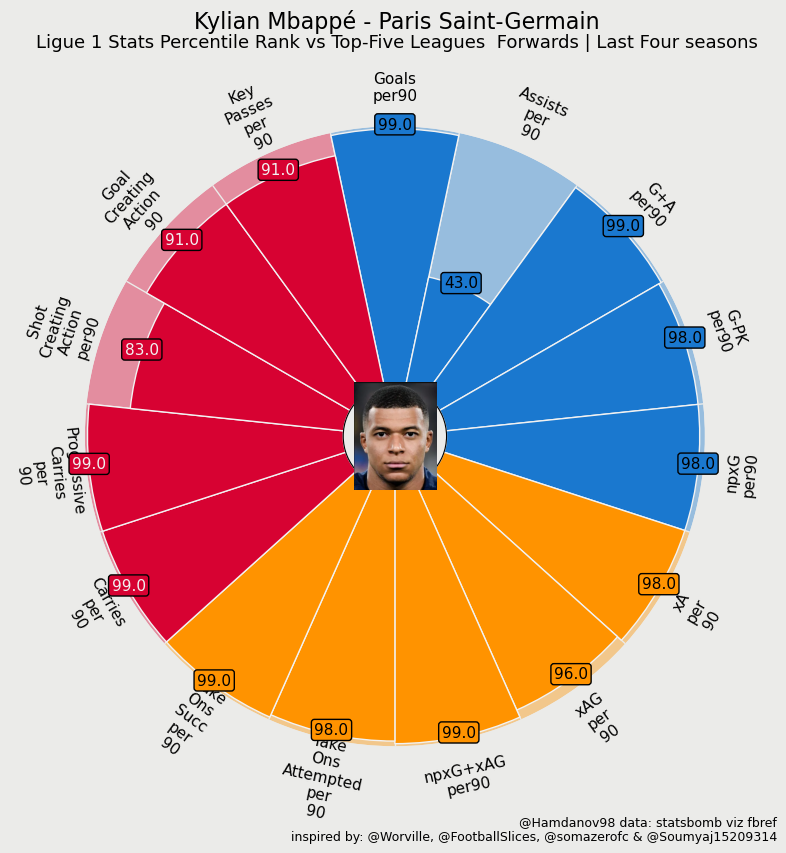

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Kylian Mbappé - Paris Saint-Germain", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues  Forwards | Last Four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mbappe/Mbappe_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


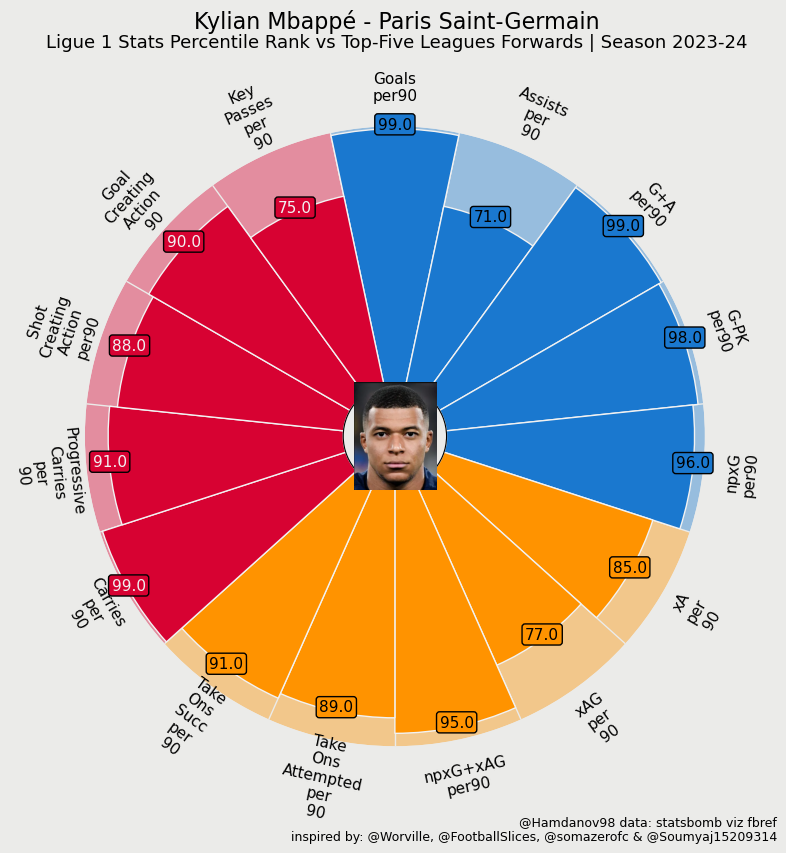

In [18]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Kylian Mbappé - Paris Saint-Germain", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Forwards | Season 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mbappe_2024/Mbappe_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming forward_players is already loaded as a DataFrame

# Removing non-numerical columns
numerical_forward_players = forward_players.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]  # Adjust if needed
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
n_components = 0
threshold = 0.95

for n in range(1, normalized_forward_players.shape[1] + 1):  # Loop through possible number of components
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    if explained_variance >= threshold:
        n_components = n
        break

print(f"Number of features to reach {threshold} explained variance: {n_components}")
explained_variances


Number of features to reach 0.95 explained variance: 38


[0.3103450349883917,
 0.4190855614328221,
 0.4810853862684008,
 0.5396209991039488,
 0.5872495603661076,
 0.6235463252496771,
 0.6533134360457922,
 0.6777335093788857,
 0.7004927413419845,
 0.7197365841638032,
 0.7379672111077318,
 0.7525436638279935,
 0.7670338396231516,
 0.7809457649892958,
 0.7941194999345983,
 0.8063486281555711,
 0.817644962402234,
 0.8283859039597454,
 0.8388096616283898,
 0.848471392971799,
 0.8578222940459244,
 0.8662709964905003,
 0.8741693576928717,
 0.8815895577183974,
 0.8887756193689623,
 0.8953876648978513,
 0.9015472814374589,
 0.9075184685177721,
 0.9131629526628172,
 0.9184492869853105,
 0.923431444501725,
 0.9280313603505274,
 0.9326090233044688,
 0.9367939617103804,
 0.9406786031775292,
 0.9443544671929793,
 0.9479365808373713,
 0.9511639381643965]

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)
transformed_df


0          1         2          3          4         5         6   \
0     1.674317   1.215753  6.347849  -3.518034  -1.132264 -2.278134 -4.336996   
1    -3.083418  -1.416751  5.238008  -0.425943  -1.290440  1.046710  2.937926   
2    -2.814810   1.567657  2.750235  -1.986210   1.127841 -0.009490 -0.806796   
3     2.009048  -6.183713  0.195777   0.157656   0.044089 -0.458892 -0.378192   
4     2.006704  -3.703004  0.365560  -3.680406   2.578641 -4.143714  2.922554   
5    -2.557011  -1.174345  0.882466   0.660380   1.194920 -0.571873 -1.422788   
6    10.362297   0.922927 -2.881922  -3.689703   0.059270  0.599353  0.433469   
7    -3.414043  -0.524361  2.425053  -0.044134  -0.174354 -0.597950 -1.652169   
8    -2.085735  -6.246237 -1.889491   0.092352   1.350097 -2.007908  0.479421   
9    -4.459890  -4.710898  0.510405   0.646962   0.689208 -3.611623 -0.987630   
10    7.180374  -2.415860  0.055359  -2.648323   0.123395 -1.582288 -1.272943   
11   -3.429045   0.309265  1.299789  -1.790126   1.660059 -0.582077 -0.464498   
12    8.626427  -3.028361 -0.397208  -2.984690  -0.580768  0.630388  1.558853   
13    8.015304   3.615768  4.372888  -3.391209  -2.251343  2.321247  0.794502   
14    7.786721   5.429253  3.365231  -3.624059  -1.209605  0.663614 -1.356991   
15    8.193543  -2.868389  0.327769   0.516568  -2.830354  3.024212  2.839051   
16    6.924611   0.647337  2.392139   1.158452  -2.854556  2.870891  0.999824   
17    1.457254  -5.721930 -1.496222   1.264709  -0.347014 -0.492544  1.114553   
18   -1.430913  -3.736068  1.342819  -0.506318  -0.003709 -1.064775  0.286644   
19    7.901159  -1.257047  1.597843  -1.937167   2.734490  3.703420 -1.888059   
20    0.252562  -2.000161  5.077384   0.702123   0.063937  3.351674  0.378124   
21   17.630627  -8.648967 -4.457823  -1.027329   2.351602 -0.868531  2.894127   
22   -1.675493  -4.360609  2.084448   0.910796   7.415666  3.511619 -0.910884   
23   -0.238081  -0.735601  0.958146  -2.712105   0.201970 -0.696719  2.043200   
24    6.885607   5.658465  2.939421   8.308937  -0.749371 -1.993679 -3.605558   
25    4.295682 -11.342092 -1.930648   3.143441  -0.451161  0.468132  0.906855   
26   -3.312096  -2.150573  2.930334   1.188869  10.179200  5.186819 -4.430113   
27   -1.742360  -1.816829  0.723699  -1.850798  -0.575522 -1.167512 -1.990109   
28    2.228079  -3.122265  1.800788   0.481998  -1.438604  1.976765  1.247280   
29    9.256429   0.769812  8.558759  -0.705021  -3.721346  3.878709 -0.319866   
30   -3.505244  -0.613933  0.013487  -0.946812   5.783453  1.736001 -0.714975   
31    7.620039  -0.276134  0.440651  -5.230921   1.322864 -3.849819  0.473192   
32   -1.477554  -3.144475  0.665264  -0.164622   4.895769  1.079717 -2.283197   
33   -0.083403 -11.130754 -2.620879   4.929244  -0.584457 -0.835227 -0.046590   
34    1.475229  -0.266463 -2.698450  -2.765495   0.043335  1.232692 -1.683480   
35    0.832848   1.037074  1.796582  -3.932395   0.368876 -2.678138  0.976679   
36   -1.625238   0.161858  3.129568  -2.554170   0.238398 -1.014642  2.161206   
37    1.341289  -3.490208  0.998165  -0.460192  -0.623710 -0.088262  0.774073   
38    6.550916   1.484260 -0.405759  -3.055425   0.005884 -0.259031  0.429196   
39    9.768293  -1.923341 -1.800329  -4.066347   0.138457 -1.258476 -0.675392   
40   -1.080567   1.071879 -2.457977  -2.385473   5.383025  1.217944  3.106491   
41   -3.306988  -1.121634 -1.073879  -1.116984   2.982574 -0.091997 -2.491680   
42   16.221646   2.136393  0.406394   4.659656  -1.657332  0.754499 -1.616724   
43   -5.277067  -2.148062  2.356073  -0.291790   0.018460 -1.954786  2.242991   
44   12.070615  -6.989921 -0.672785  -1.285501  -0.363379 -0.225219 -0.036996   
45    2.560679  -1.920441 -2.393083   0.114591  -1.506896  1.050161 -1.221009   
46    6.109057   6.196830  1.478720   2.730110   2.315356 -4.669924 -2.195520   
47    1.760413  -1.447786  2.106259  -1.904132   0.785980 -2.277487  0.826349   
48   -2.277865  -2.376161 -0.214547  -1.236

In [21]:
# Remove Declan Rice's row and store it in a separate variable
rice_data = transformed_df.iloc[21].copy()
transformed_df = transformed_df.drop(transformed_df.index[21])

# Compute cosine similarity between each player and Declan Rice
similarity_scores = cosine_similarity(transformed_df, rice_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_mbappe'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_mbappe', ascending=False).head(10)
top_similar_players

0         1         2         3         4         5         6  \
56  15.889850 -1.470770 -3.006816 -7.239470  2.313568 -2.294727  2.290462   
44  12.070615 -6.989921 -0.672785 -1.285501 -0.363379 -0.225219 -0.036996   
39   9.768293 -1.923341 -1.800329 -4.066347  0.138457 -1.258476 -0.675392   
96   9.124835 -1.827273 -1.002933 -1.964073  0.985745 -1.444648  1.826434   
10   7.180374 -2.415860  0.055359 -2.648323  0.123395 -1.582288 -1.272943   
73  11.055849 -7.811426  0.244540  2.376059 -3.318189  3.731012 -1.799991   
12   8.626427 -3.028361 -0.397208 -2.984690 -0.580768  0.630388  1.558853   
6   10.362297  0.922927 -2.881922 -3.689703  0.059270  0.599353  0.433469   
59  16.091556  0.699509 -5.141424  6.912546  1.439137 -0.151744  4.460674   
49  18.816278  5.140302 -3.579889  1.460739 -0.069728  0.381962  2.037898   

           7         8         9        10        11        12        13  \
56 -0.562381 -0.745216 -1.669804 -2.026398  0.089582  1.786800  0.850902   
44 -1.644158 -2.873407 -0.386520  0.637764  1.931211 -0.193755  1.393959   
39 -1.816074 -2.133333 -0.175208 -0.006807  0.712376 -0.571453  1.102330   
96 -1.860924  2.097156 -0.302311 -1.201743  0.185113  1.254978 -0.865281   
10 -2.529519  0.312569  0.605915 -0.905858  1.301936  0.321774  1.526836   
73 -2.047117  0.177654 -0.796456 -1.529537 -1.674930  1.773041 -0.067606   
12  0.018890 -2.467086 -0.472146  1.120074 -0.391852 -1.274533 -1.127765   
6  -0.048059 -1.845344  0.537740 -0.001512 -2.591885  2.326846  0.555041   
59  1.104098  3.840164 -1.195826  2.723633 -0.098325 -0.909399  0.903382   
49 -3.684632 -1.625874 -1.201203 -0.504765 -1.297988  2.047089 -0.183009   

          14        15        16        17        18        19        20  \
56  0.710230 -1.679332  1.551371 -0.131456 -0.022764 -0.953095 -0.335097   
44 -1.978941  0.901209  1.594650 -0.700732 -0.637611 -0.258632 -0.660464   
39 -1.279287 -0.400454  0.316135 -0.959936  0.521465  0.129363 -1.636589   
96  3.638809  1.176192 -1.601843 -0.233643  0.252823  0.811702 -0.034327   
10  0.579300 -0.272955  0.685316  0.667954 -1.096519  0.358325 -1.443958   
73 -0.830702 -1.857392  1.972825 -0.298128  0.744606 -0.243846  0.090618   
12 -1.841672  1.088578  0.646061 -0.297085  0.164181  0.862780 -0.210306   
6   1.196791 -2.081695  1.232002  0.431879  1.598281 -1.259348  0.479760   
59  0.279301  0.021512 -1.957804 -1.735035 -0.194191 -1.437428  1.049373   
49 -0.101854 -1.348306  1.034727 -1.344644 -0.686600 -0.668096  0.980855   

          21        22        23        24        25        26        27  \
56 -0.735962  1.173381  0.020297 -0.953161 -0.540934  0.981812  1.222001   
44 -0.331508 -1.439656 -0.322563 -0.243956 -1.120278 -0.253682 -0.301927   
39  0.225969 -0.395789 -0.418431  0.038430 -0.813204  0.068277 -0.199114   
96 -1.529463 -0.101631 -2.339786 -0.021258  0.568163 -0.739486  1.350858   
10 -0.601881 -1.038765 -0.959778 -0.237021  0.592421 -0.350338  1.426231   
73  0.699324 -0.925693  1.045687  0.005849  0.155473  0.027146  0.320132   
12 -0.347192  1.358597  1.145418 -0.861964 -0.233440  0.315638  0.639101   
6  -1.090027 -1.240435  0.721011 -0.014610  0.343332 -0.745317  0.131183   
59  0.680092 -1.853523 -0.167108 -1.164106  0.999670  0.045747 -0.071777   
49  0.374930  1.059877 -0.043849 -0.361276  0.311429  0.019275  0.784555   

          28        29        30        31        32        33        34  \
56  0.887340  0.806096 -0.624390 -0.864014 -0.326251 -0.175476  0.048218   
44 -0.059572  0.759059  0.770197 -1.043243  1.411174  0.717347 -0.673613   
39 -0.702769 -0.190321 -0.645206  0.080177  0.136611  0.358507  0.131578   
96  1.146785 -0.022065  0.883264  0.352863  0.530355 -0.641125  0.931213   
10  0.618008  1.059811  0.014171 -0.026497 -0.654147  0.514140  0.474588   
73  0.607897  1.173952 -0.541967 -0.577631  0.602370 -0.480450 -1.119444   
12  0.183926  0.394526 -0.422485 -0.024764 -0.115361  0.841509 -0.123887   
6   0.609761 -0.159057  0.001235  0.762113 -0

In [22]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_mbappe', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = forward_players.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0                    Player   Nation Pos  \
56          418           Vinicius Júnior   br BRA  FW   
44          359             Mohamed Salah   eg EGY  FW   
39          337           Raheem Sterling  eng ENG  FW   
96          739               Rafael Leão   pt POR  FW   
10           85           Marcus Rashford  eng ENG  FW   
73          558             Karim Benzema   fr FRA  FW   
12          122                Sadio Mané   sn SEN  FW   
6            47                   Rodrygo   br BRA  FW   
59          432               Luis Muriel   co COL  FW   
49          377           Ousmane Dembélé   fr FRA  FW   
52          389         Wissam Ben Yedder   fr FRA  FW   
42          349              Riyad Mahrez   dz ALG  FW   
80          596             Gabriel Jesus   br BRA  FW   
19          192          Karl Toko Ekambi   cm CMR  FW   
86          655                Iago Aspas   es ESP  FW   
92          700                Harry Kane  eng ENG  FW   
76          576                Diogo Jota   pt POR  FW   
31          291             Wilfried Zaha   ci CIV  FW   
15          167             Gerard Moreno   es ESP  FW   
25          217        Robert Lewandowski   pl POL  FW   
51          384              Duván Zapata   co COL  FW   
170        1214     Khvicha Kvaratskhelia   ge GEO  FW   
103         793        Gabriel Martinelli   br BRA  FW   
100         773             Donyell Malen   nl NED  FW   
71          544             Ciro Immobile   it ITA  FW   
91          691          Domenico Berardi   it ITA  FW   
53          390             Son Heung-min   kr KOR  FW   
62          464              Paulo Dybala   ar ARG  FW   
68          507            Joaquín Correa   ar ARG  FW   
4            35         Randal Kolo Muani   fr FRA  FW   
81          611           Roberto Firmino   br BRA  FW   
117         882           Felipe Anderson   br BRA  FW   
38          335            Hirving Lozano   mx MEX  FW   
114         863           Gerard Deulofeu   es ESP  FW   
17          185             Romelu Lukaku   be BEL  FW   
106         817                 Luis Díaz   co COL  FW   
3            31          Lautaro Martínez   ar ARG  FW   
70          529            Jonathan David   ca CAN  FW   
85          645       Alexandre Lacazette   fr FRA  FW   
90          690               André Silva   pt POR  FW   
37          334             Álvaro Morata   es ESP  FW   
29          245            Florian Sotoca   fr FRA  FW   
33          297            Erling Haaland   no NOR  FW   
101         782             Nico Williams   es ESP  FW   
16          178             Alassane Pléa   fr FRA  FW   
13          153          Nicolás González   ar ARG  FW   
99          757             Lucas Ocampos   ar ARG  FW   
157         742                 Ansu Fati   es ESP  FW   
28          235                Edin Džeko   ba BIH  FW   
14          159       Alexis Saelemaekers   be BEL  FW   
165        1050                 Junya Ito   jp JPN  FW   
45          361         Kelechi Iheanacho   ng NGA  FW   
98          749           Michail Antonio   jm JAM  FW   
94          707             Kévin Gameiro   fr FRA  FW   
58          430              Wahbi Khazri   tn TUN  FW   
34          298           Anthony Martial   fr FRA  FW   
47          363            Iñaki Williams   gh GHA  FW   
139        1104                   Willian   br BRA  FW   
74          559               Andy Delort   dz ALG  FW   
79          595            Alexander Isak   se SWE  FW   
8            66            Victor Osimhen   ng NGA  FW   
72          549             Ollie Watkins  eng ENG  FW   
142         107                    Antony   br BRA  FW   
46          362              Demarai Gray   jm JAM  FW   
24          212             Daniele Verde   it ITA  FW   
118         889              Hugo Ekitike   fr FRA  FW   
127         976             Omar Marmoush   eg EGY  FW   
124         945              Bryan Mbeumo   cm CMR  FW   
32 

In [23]:
forward_players['similarity_to_mbappe']=transformed_df['similarity_to_mbappe']
forward_players[['Player', 'similarity_to_mbappe']]


Player  similarity_to_mbappe
0              Emmanuel Gyasi             -0.056485
1                Steve Mounié             -0.252908
2             Sergi Guardiola             -0.604448
3            Lautaro Martínez              0.445139
4           Randal Kolo Muani              0.500724
5                  Danny Ings             -0.327939
6                     Rodrygo              0.706076
7                 Roger Martí             -0.531540
8              Victor Osimhen              0.167777
9                 Jamie Vardy             -0.214378
10            Marcus Rashford              0.766346
11              Kevin Lasagna             -0.364507
12                 Sadio Mané              0.730035
13           Nicolás González              0.325320
14        Alexis Saelemaekers              0.254610
15              Gerard Moreno              0.595957
16              Alassane Pléa              0.334356
17              Romelu Lukaku              0.458344
18              Tammy Abraham             -0.028359
19           Karl Toko Ekambi              0.641725
20            Ludovic Ajorque              0.040022
21              Kylian Mbappé                   NaN
22             Dušan Vlahović              0.021284
23             Andrea Belotti             -0.032089
24              Daniele Verde              0.136944
25         Robert Lewandowski              0.595800
26           Francesco Caputo             -0.169054
27               M'Bala Nzola             -0.122109
28                 Edin Džeko              0.283134
29             Florian Sotoca              0.356514
30            Ignatius Ganago             -0.190666
31              Wilfried Zaha              0.605582
32                Terem Moffi              0.081380
33             Erling Haaland              0.341858
34            Anthony Martial              0.199923
35                Richarlison             -0.017697
36                       Kiké             -0.273198
37              Álvaro Morata              0.365215
38             Hirving Lozano              0.470237
39            Raheem Sterling              0.780983
40           Georginio Rutter              0.005485
41                 Moise Kean             -0.217695
42               Riyad Mahrez              0.651670
43               Ante Budimir             -0.425866
44              Mohamed Salah              0.825475
45          Kelechi Iheanacho              0.232471
46               Demarai Gray              0.138529
47             Iñaki Williams              0.197992
48              Danny Welbeck             -0.255310
49            Ousmane Dembélé              0.677071
50         Federico Bonazzoli             -0.286416
51               Duván Zapata              0.592194
52          Wissam Ben Yedder              0.666308
53              Son Heung-min              0.525543
54          Alexander Sørloth             -0.021904
55             Borja Iglesias             -0.181431
56            Vinicius Júnior              0.836060
57      Florian Niederlechner             -0.499776
58               Wahbi Khazri              0.200245
59                Luis Muriel              0.687376
60          Youssef En-Nesyri             -0.360711
61                     Joselu              0.038995
62               Paulo Dybala              0.501365
63             Anthony Lozano             -0.375528
64              Patrik Schick             -0.072795
65                   Rafa Mir             -0.506179
66           Antonio Sanabria             -0.281267
67              Callum Wilson             -0.167570
68             Joaquín Correa              0.501018
69            Arkadiusz Milik             -0.260900
70             Jonathan David              0.436371
71              Ciro Immobile              0.559189
72              Ollie Watkins              0.155802
73              Karim Benzema              0.731750
74                Andy Delort              0.177322
75          Gianluca Scamacca             -0.347173
76                 

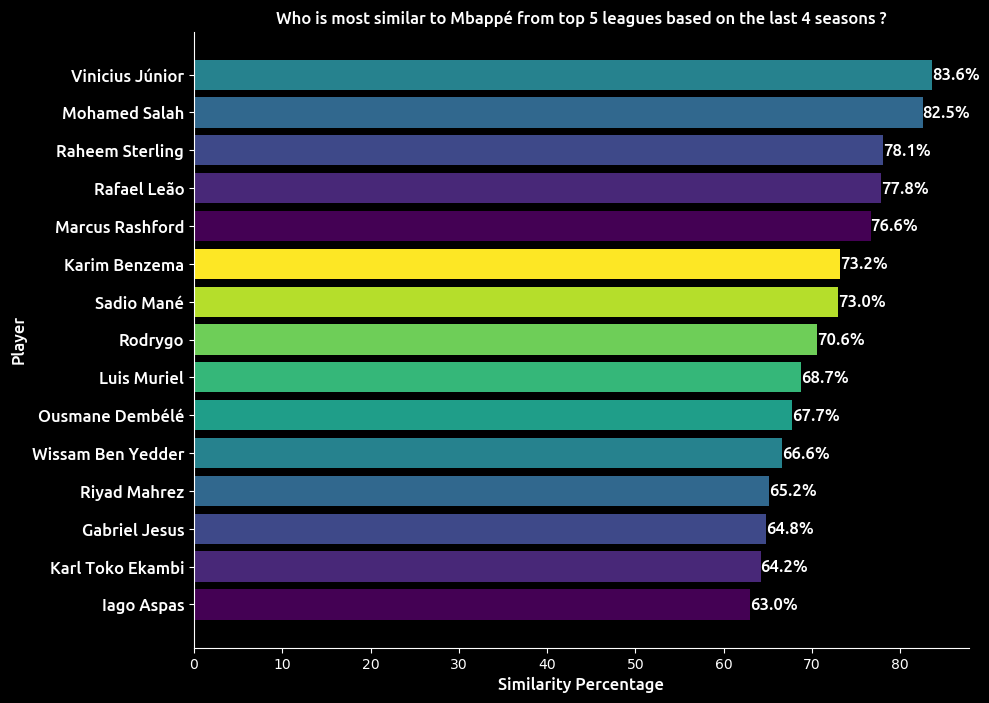

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_mbappe', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(15)[::-1], (forward_players_sorted['similarity_to_mbappe'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Mbappé from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Mbappe/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [25]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming forward_players is already loaded as a DataFrame

# Removing non-numerical columns
numerical_forward_players = player_2024.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]  # Adjust if needed
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
n_components = 0
threshold = 0.95

for n in range(1, normalized_forward_players.shape[1] + 1):  # Loop through possible number of components
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    if explained_variance >= threshold:
        n_components = n
        break

print(f"Number of features to reach {threshold} explained variance: {n_components}")
explained_variances


Number of features to reach 0.95 explained variance: 40


[0.3068851505586158,
 0.41663912438035217,
 0.48423181072109084,
 0.5316872022296731,
 0.5706576967825627,
 0.6044881569006547,
 0.6335618869480495,
 0.6588620181757765,
 0.6818232654550571,
 0.7034408389073343,
 0.7231599574216699,
 0.741058841221172,
 0.7566428571300915,
 0.7713803803949227,
 0.784494148865424,
 0.7965486594230653,
 0.8075346903260373,
 0.8179146830618725,
 0.8276950778553569,
 0.8365965404310367,
 0.8451300692763991,
 0.8533696999526413,
 0.8613179805219855,
 0.8689728587209674,
 0.8760466833663906,
 0.8827894864321395,
 0.8892396404527437,
 0.8953278823587895,
 0.9012175957379235,
 0.9069252948127562,
 0.912239201988023,
 0.9174083673341611,
 0.9222693393693248,
 0.9269845701514362,
 0.9312851158726432,
 0.9353079750538199,
 0.9392530541053115,
 0.9430498788373677,
 0.946673706962434,
 0.950081070135771]

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [27]:
# Remove Harry rice's row and store it in a separate variable
rice_data = transformed_df.iloc[91].copy()
transformed_df = transformed_df.drop(transformed_df.index[91])

# Compute cosine similarity between each player and Harry rice
similarity_scores = cosine_similarity(transformed_df, rice_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_mbappe_2024'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_mbappe_2024', ascending=False).head(10)


In [28]:
# Get the top 10 players most similar to rice
top_similar_players_indices_2024 = transformed_df.sort_values('similarity_to_mbappe_2024', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_2024= player_2024.loc[top_similar_players_indices_2024]
top_similar_players_2024

Unnamed: 0                     Player   Nation Pos  \
122        2201              Mohamed Salah   eg EGY  FW   
119        2151                    Rodrygo   br BRA  FW   
57         1087              Son Heung-min   kr KOR  FW   
74         1335      Khvicha Kvaratskhelia   ge GEO  FW   
123        2232                 Leroy Sané   de GER  FW   
37          670                  Luis Díaz   co COL  FW   
53         1013            Serhou Guirassy   gn GUI  FW   
69         1204            Vinicius Júnior   br BRA  FW   
139        2489              Ferrán Torres   es ESP  FW   
19          324            Victor Boniface   ng NGA  FW   
82         1379                Rafael Leão   pt POR  FW   
71         1237                 Harry Kane  eng ENG  FW   
87         1557         Gabriel Martinelli   br BRA  FW   
31          535             Kingsley Coman   fr FRA  FW   
156          37                Jeremy Doku   be BEL  FW   
97         1717              Gerard Moreno   es ESP  FW   
44          813                 João Félix   pt POR  FW   
93         1690               Kaoru Mitoma   jp JPN  FW   
151        2701              Edon Zhegrova   xk KVX  FW   
121        2198                Bukayo Saka  eng ENG  FW   
110        2034            Matteo Politano   it ITA  FW   
88         1562           Lautaro Martínez   ar ARG  FW   
115        2089            Marcus Rashford  eng ENG  FW   
145        2638                    Willian   br BRA  FW   
29          502            Federico Chiesa   it ITA  FW   
33          606            Mohammed Daramy   dk DEN  FW   
113        2056          Christian Pulisic   us USA  FW   
50          962             Anthony Gordon  eng ENG  FW   
34          614             Jonathan David   ca CAN  FW   
47          904         Alejandro Garnacho   ar ARG  FW   
143        2635             Iñaki Williams   gh GHA  FW   
10          138                 Iago Aspas   es ESP  FW   
149        2661               Lamine Yamal   es ESP  FW   
105        1886                Loïs Openda   be BEL  FW   
103        1833               Darwin Núñez   uy URU  FW   
68         1192                 Diogo Jota   pt POR  FW   
144        2637              Nico Williams   es ESP  FW   
49          959           Nicolás González   ar ARG  FW   
35          629        Romain Del Castillo   fr FRA  FW   
62         1139             Alexander Isak   se SWE  FW   
64         1173              Gabriel Jesus   br BRA  FW   
17          269           Domenico Berardi   it ITA  FW   
141        2616              Ollie Watkins  eng ENG  FW   
100        1786              Iliman Ndiaye   sn SEN  FW   
152        2706             Joshua Zirkzee   nl NED  FW   
136        2466              Marcus Thuram   fr FRA  FW   
135        2455            Florian Thauvin   fr FRA  FW   
140        2596             Dušan Vlahović   rs SRB  FW   
16          240           Maximilian Beier   de GER  FW   
13          188            Folarin Balogun   us USA  FW   
58         1112         Callum Hudson-Odoi  eng ENG  FW   
133        2423            Musa Al-Taamari   jo JOR  FW   
158          69          Randal Kolo Muani   fr FRA  FW   
55         1030             Erling Haaland   no NOR  FW   
92         1612               Bryan Mbeumo   cm CMR  FW   
63         1152            Nicolas Jackson   sn SEN  FW   
90         1598              Borja Mayoral   es ESP  FW   
125        2257          Gianluca Scamacca   it ITA  FW   
83         1399         Robert Lewandowski   pl POL  FW   
150        2673            Mattia Zaccagni   it ITA  FW   
166         134               Duván Zapata   co COL  FW   
132        2422          Alexander Sørloth   no NOR  FW   
39          738             Marvin Ducksch   de GER  FW   
11          145  Pierre-Emerick Aubameyang   ga GAB  FW   
2            20              Simon Adingra   ci CIV  FW   
80         1365           Armand Lauriente   fr FRA  FW   
96         1713              Álvaro Morata   es ESP 

In [29]:
player_2024['similarity_to_mbappe_2024']=transformed_df['similarity_to_mbappe_2024']
player_2024[['Player', 'similarity_to_mbappe_2024']]


Player  similarity_to_mbappe_2024
0                   Akor Adams                  -0.287790
1               Elijah Adebayo                  -0.209220
2                Simon Adingra                   0.048717
3              Ludovic Ajorque                  -0.408210
4               Miguel Almirón                   0.009160
5              Pontus Almqvist                  -0.334424
6                 Zeki Amdouni                  -0.256505
7              Felipe Anderson                  -0.041950
8              Michail Antonio                  -0.471215
9                       Antony                  -0.098053
10                  Iago Aspas                   0.296505
11   Pierre-Emerick Aubameyang                   0.067549
12               Taiwo Awoniyi                  -0.252891
13             Folarin Balogun                   0.184344
14                Lameck Banda                  -0.079534
15               Léo Baptistão                  -0.595722
16            Maximilian Beier                   0.199040
17            Domenico Berardi                   0.238182
18              Álex Berenguer                  -0.095246
19             Victor Boniface                   0.520792
20                Rafael Borré                  -0.342316
21                Jarrod Bowen                  -0.038121
22                  Lucas Boyé                  -0.360362
23                Ante Budimir                  -0.311132
24       Dominic Calvert-Lewin                  -0.480426
25              Sergio Camello                  -0.356156
26            Francesco Caputo                  -0.429025
27        Valentín Castellanos                  -0.412297
28              Walid Cheddira                  -0.458716
29             Federico Chiesa                   0.349859
30             Lorenzo Colombo                  -0.566943
31              Kingsley Coman                   0.461637
32              Thijs Dallinga                  -0.408500
33             Mohammed Daramy                   0.337705
34              Jonathan David                   0.317328
35         Romain Del Castillo                   0.262113
36                 Assane Diao                  -0.471277
37                   Luis Díaz                   0.580402
38                Artem Dovbyk                  -0.039198
39              Marvin Ducksch                   0.069374
40                   Hugo Duro                  -0.257728
41              Anthony Elanga                  -0.124113
42              Emanuel Emegha                  -0.494940
43           Youssef En-Nesyri                  -0.443102
44                  João Félix                   0.430221
45               Evan Ferguson                  -0.374496
46                 Lyle Foster                  -0.519983
47          Alejandro Garnacho                   0.309992
48              Olivier Giroud                  -0.210870
49            Nicolás González                   0.268364
50              Anthony Gordon                   0.324237
51         Michael Gregoritsch                  -0.445067
52              Evann Guessand                  -0.102942
53             Serhou Guirassy                   0.563630
54              Gorka Guruzeta                  -0.258963
55              Erling Haaland                   0.156881
56            Munir El Haddadi                  -0.243056
57               Son Heung-min                   0.674210
58          Callum Hudson-Odoi                   0.177478
59              Rasmus Højlund                  -0.253306
60              Jonathan Ikone                  -0.109578
61               Ciro Immobile                  -0.133123
62              Alexander Isak                   0.250198
63             Nicolas Jackson                   0.146666
64               Gabriel Jesus                   0.241762
65                Raúl Jiménez                  -0.567455
66                Willian José                  -0.207386
67                      Joselu                  -0.081689
68                  Di

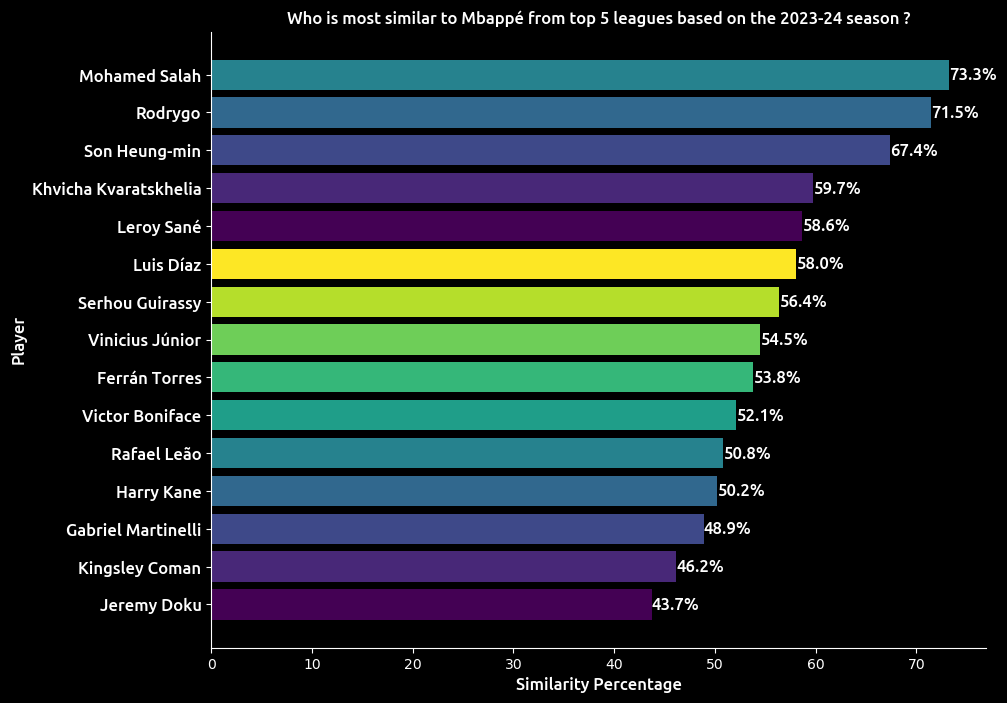

In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_rice in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_mbappe_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_mbappe_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Mbappé from top 5 leagues based on the 2023-24 season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Mbappe_2024/Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
